<a href="https://colab.research.google.com/github/luisangel22091102/TAREAS-DE-METODOS-DE-SIMULACION/blob/main/TAREA_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MENDEZ VASQUEZ LUIS ANGEL

202086765

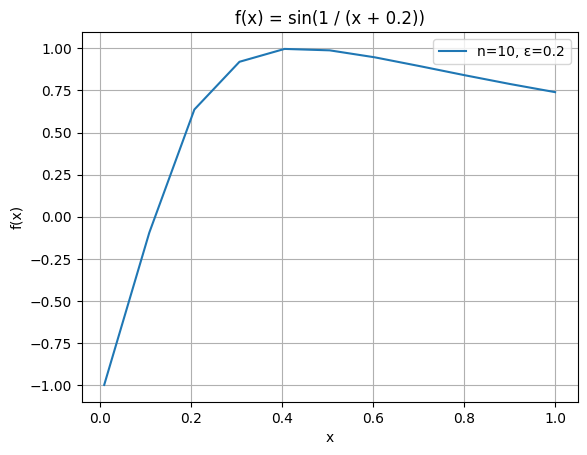

No se alcanzó la tolerancia con n ≤ 1000
Para ε=0.2, se necesitan al menos n=1100 nodos para una diferencia < 0.1.


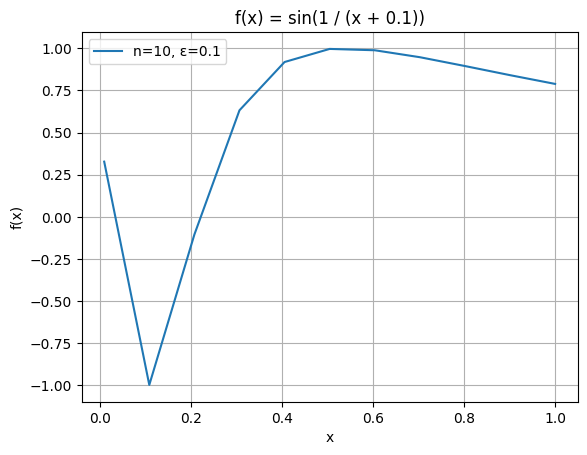

No se alcanzó la tolerancia con n ≤ 1000
Para ε=0.1, se necesitan al menos n=1100 nodos para una diferencia < 0.1.


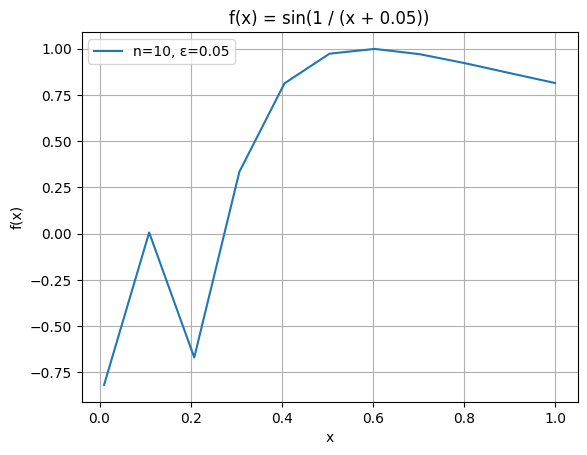

No se alcanzó la tolerancia con n ≤ 1000
Para ε=0.05, se necesitan al menos n=1100 nodos para una diferencia < 0.1.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#función f(x)
def f(x, epsilon):
    return np.sin(1 / (x + epsilon))


def graficar_f(epsilon, n, intervalo=(0.01, 1)):
    a, b = intervalo
    x = np.linspace(a, b, n+1)
    y = f(x, epsilon)

    plt.plot(x, y, label=f"n={n}, ε={epsilon}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.title(f"f(x) = sin(1 / (x + {epsilon}))")
    plt.legend()
    plt.grid()
    plt.show()

def determinar_n(epsilon, tolerancia=0.01, intervalo=(0.1, 1), max_n=1000):
    a, b = intervalo
    n = 100
    diff = float("inf")

    while diff > tolerancia and n <= max_n:
        n += 100
        x1 = np.linspace(a, b, n+1)
        x2 = np.linspace(a, b, n+11)
        y1 = f(x1, epsilon)
        y2 = f(x2, epsilon)
        diff = np.max(np.abs(y1 - f(np.interp(x1, x2, y2), epsilon)))
    if n > max_n:
        print(f"No se alcanzó la tolerancia con n ≤ {max_n}")
    return n

epsilon_values = [1/5, 1/10, 1/20]
for epsilon in epsilon_values:
    graficar_f(epsilon, n=10)
    n_optimo = determinar_n(epsilon)
    print(f"Para ε={epsilon}, se necesitan al menos n={n_optimo} nodos para una diferencia < 0.1.")


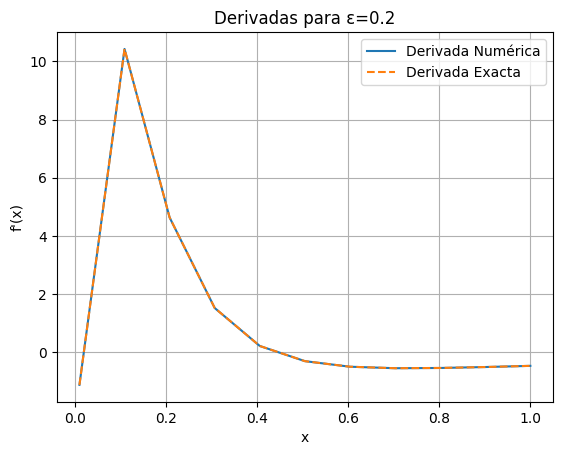

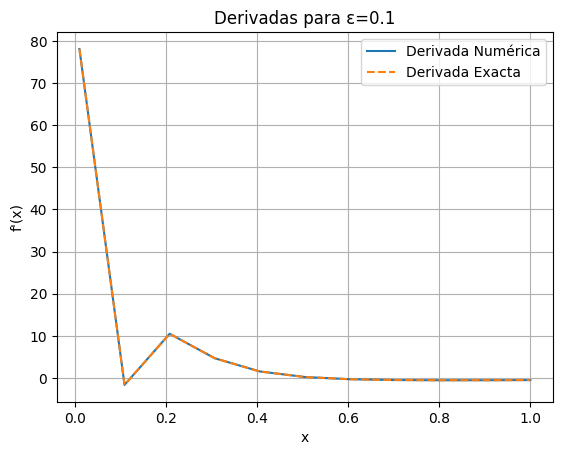

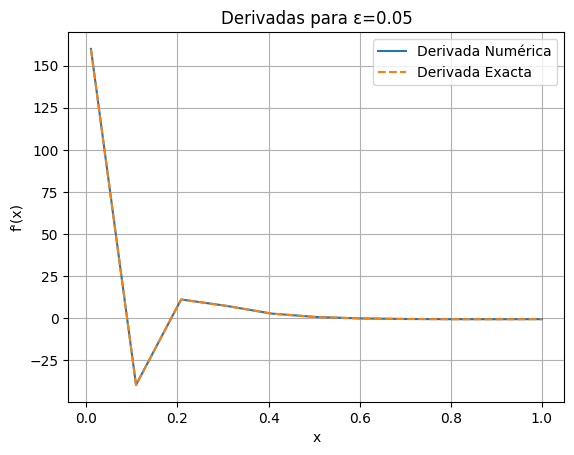

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def f(x, epsilon):
    return np.sin(1 / (x + epsilon))


def derivada_exacta(x, epsilon):
    return -np.cos(1 / (x + epsilon)) / (x + epsilon)**2


def derivada_numerica(f, x, epsilon, h=1e-5):
    return (f(x + h, epsilon) - f(x, epsilon)) / h


def comparar_derivadas(epsilon, n, intervalo=(0.01, 1)):
    a, b = intervalo
    x = np.linspace(a, b, n+1)
    deriv_num = derivada_numerica(f, x, epsilon)
    deriv_exact = derivada_exacta(x, epsilon)

    plt.plot(x, deriv_num, label="Derivada Numérica")
    plt.plot(x, deriv_exact, label="Derivada Exacta", linestyle="dashed")
    plt.xlabel("x")
    plt.ylabel("f'(x)")
    plt.title(f"Derivadas para ε={epsilon}")
    plt.legend()
    plt.grid()
    plt.show()

# Pruebas
epsilon_values = [1/5, 1/10, 1/20]
for epsilon in epsilon_values:
    comparar_derivadas(epsilon, n=10)

In [ ]:
from scipy.special import roots_legendre
import numpy as np


def g(x):
    return np.exp(4 * x)


def gauss_legendre_integral(f, a, b, n):
    nodes, weights = roots_legendre(n)
    # Transformación al intervalo [a, b]
    t = 0.5 * (nodes + 1) * (b - a) + a
    w = 0.5 * (b - a) * weights
    return np.sum(w * f(t))

# Cálculo de la integral
a, b = 0, 1
n_values = [2, 4, 8, 16]

for n in n_values:
    resultado = gauss_legendre_integral(g, a, b, n)
    print(f"n={n}, Integral ≈ {resultado:.6f}")

n=2, Integral ≈ 12.887345
n=4, Integral ≈ 13.399237
n=8, Integral ≈ 13.399538
n=16, Integral ≈ 13.399538


In [ ]:
import numpy as np
from scipy.special import roots_legendre

def integrand(x):
    return np.exp(-x**2)

# Gauss-Legendre
def gauss_legendre_integral(f, L, n):

    nodes, weights = roots_legendre(n)


    x = 0.5 * L * (nodes + 1)


    integral_value = 0.5 * L * np.sum(weights * f(x))
    return integral_value


def compute_table():
    n_values = [100, 200, 300, 400, 500]
    L_values = [2, 4, 6, 8, 10]

    # Print header row for L values
    print("n/L  ", end="  ")
    for L in L_values:
        print(f"L={L}", end="  ")
    print()


    for n in n_values:
        print(f"{n:4d}", end="  ")
        for L in L_values:
            integral_result = gauss_legendre_integral(integrand, L, n)
            print(f"{integral_result:0.6f}", end="  ")
        print()

compute_table()


n/L    L=2  L=4  L=6  L=8  L=10  
 100  0.882081  0.886227  0.886227  0.886227  0.886227  
 200  0.882081  0.886227  0.886227  0.886227  0.886227  
 300  0.882081  0.886227  0.886227  0.886227  0.886227  
 400  0.882081  0.886227  0.886227  0.886227  0.886227  
 500  0.882081  0.886227  0.886227  0.886227  0.886227  
